https://www.kaggle.com/c/aerial-cactus-identification

In [1]:
import cv2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPool2D, Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Change directory
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Deep learning/Data/aerial-cactus-identification")
# Print out the current directory
!pwd


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Deep learning/Data/aerial-cactus-identification


In [3]:
from zipfile import ZipFile

with ZipFile('train.zip') as zipper:
    zipper.extractall()

with ZipFile('test.zip') as zipper:
    zipper.extractall()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-1691daadab3b>", line 4, in <cell line: 3>
    zipper.extractall()
  File "/usr/lib/python3.10/zipfile.py", line 1647, in extractall
    self._extract_member(zipinfo, path, pwd)
  File "/usr/lib/python3.10/zipfile.py", line 1702, in _extract_member
    shutil.copyfileobj(source, target)
  File "/usr/lib/python3.10/shutil.py", line 187, in copyfileobj
    def copyfileobj(fsrc, fdst, length=0):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exc

TypeError: ignored

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [4]:
train_directory = 'train'
test_directory = 'test'

TypeError: ignored

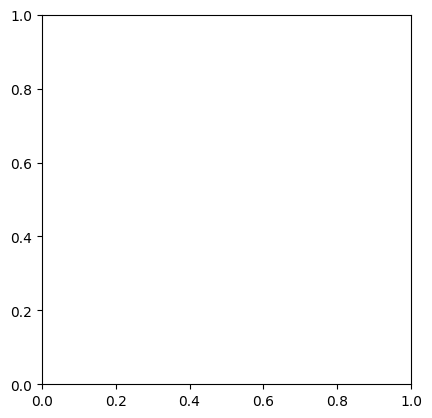

In [5]:
img = cv2.imread('train/0004be2cfeaba1c0361d39e2b000257b.jpg')
plt.imshow(img)

In [6]:
img.shape

AttributeError: ignored

The Keras ImageDataGenerator object can be used to apply data augmentation. Performing data augmentation is a form of regularization, enabling our model to generalize better.

**rescale**: rescales the pixels such that their brightness ranges from 0 to 1  
**validation_split**: portion of images set aside for validation  
**shear_range**: randomly displaces each point in fixed direction  
**zoom_range**: randomly zooms inside pictures. If you pass a float, then [lower, upper] = [1-zoom_range, 1+zoom_range]  
**horizonal_flip**: randomly flips the image horizontally  

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.15,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [8]:
df['has_cactus'] = df['has_cactus'].astype(str)
train_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'training',
    x_col = 'id',
    y_col = 'has_cactus',
    target_size = (32,32),
    class_mode = 'binary'
)
val_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'validation',
    x_col = 'id',
    y_col = 'has_cactus',
    target_size = (32,32),
    class_mode = 'binary'
)

Found 3735 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 13107 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


Found 658 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 13107 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


### Model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3) ,activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 2000,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = 64
)

<ipython-input-11-789f0df88641>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
  34/2000 [..............................] - ETA: 14:07:16 - loss: 0.5791 - accuracy: 0.7197

KeyboardInterrupt: ignored

In [ ]:
ids = []
X_test = []
for image in os.listdir(test_directory):
    ids.append(image.split('.')[0])
    path = os.path.join(test_directory, image)
    X_test.append(cv2.imread(path))

X_test = np.array(X_test)
X_test = X_test.astype('float32') / 255

predictions = model.predict(X_test)